In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier


In [2]:
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_col=X.columns
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [4]:
#Fit 100 trees and bag them
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, random_state=0,oob_score=True)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, random_state=0)

In [5]:
y_pred=bag.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',bag.oob_score_)

Test Accuracy: 0.7337662337662337 Oob Accuracy: 0.758957654723127


In [6]:
#Fit random forests
clf=RandomForestClassifier(random_state=0,n_estimators=100,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',clf.oob_score_)

Test Accuracy: 0.7662337662337663 Oob Accuracy: 0.755700325732899


In [7]:
#Let's try different numbers of trees
Oob_Accuracy=[]
for i in np.linspace(start = 50, stop = 500, num = 10):
    clf=RandomForestClassifier(random_state=0,n_estimators=int(i),oob_score=True)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Trees','Oob Accuracy'])
df

,Number_of_Trees,Oob Accuracy
0,50.0,0.7345276872964169
1,100.0,0.755700325732899
2,150.0,0.762214983713355
3,200.0,0.7638436482084691
4,250.0,0.7736156351791531
5,300.0,0.7736156351791531
6,350.0,0.7785016286644951
7,400.0,0.7719869706840391
8,450.0,0.7719869706840391
9,500.0,0.7736156351791531


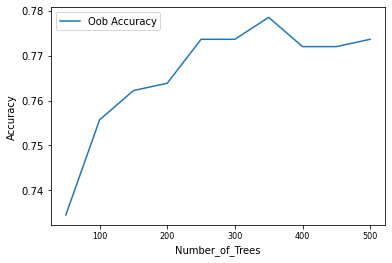

In [8]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['Number_of_Trees'].values,df['Oob Accuracy'].values,label = 'Oob Accuracy')
ax.set_xlabel('Number_of_Trees')
ax.set_ylabel('Accuracy')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [9]:
#Although we picked 350, we could have picked a bigger number. Higher Number of trees do not lead to overfitting
clf=RandomForestClassifier(random_state=0,n_estimators=350,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

In [10]:
#Let's try different numbers of features at each split (default is sqrt(p) where p is the number of features)
Oob_Accuracy=[]
for i in range(1,9):
    clf=RandomForestClassifier(random_state=0,n_estimators=350,max_features=i,oob_score=True)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Features','Oob Accuracy'])
df

,Number_of_Features,Oob Accuracy
0,1,0.7719869706840391
1,2,0.7785016286644951
2,3,0.7899022801302932
3,4,0.7785016286644951
4,5,0.7736156351791531
5,6,0.7736156351791531
6,7,0.7654723127035831
7,8,0.7785016286644951


In [11]:
clf=RandomForestClassifier(random_state=0,n_estimators=350,max_features=3,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7532467532467533


In [12]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10,stratify=y)

In [13]:
Oob_Accuracy=[]
for i in range(1,9):
    clf=RandomForestClassifier(random_state=0,n_estimators=350,max_features=i,oob_score=True)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Features','Oob Accuracy'])
df

,Number_of_Features,Oob Accuracy
0,1,0.754071661237785
1,2,0.758957654723127
2,3,0.7687296416938111
3,4,0.760586319218241
4,5,0.754071661237785
5,6,0.7719869706840391
6,7,0.758957654723127
7,8,0.760586319218241


In [14]:
clf=RandomForestClassifier(random_state=0,n_estimators=350,max_features=6,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7857142857142857


In [15]:
clf=RandomForestClassifier(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [1,2,3,4,5,6,7,8]
# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
params

{'n_estimators': [100, 200, 300, 400, 500, 600],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8]}

In [16]:
# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   42.6s finished


{'max_features': 4, 'n_estimators': 300}


In [17]:
clf=RandomForestClassifier(random_state=0,n_estimators=300,max_features=4,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7857142857142857


In [18]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [19]:
# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)
#The results are different :) This will always happen because there is variability due to a change in training and test sets

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   47.0s finished


{'max_features': 6, 'n_estimators': 100}


In [20]:
clf=RandomForestClassifier(random_state=0,n_estimators=100,max_features=6,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7532467532467533


In [21]:
clf=RandomForestClassifier(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [1,2,3,4,5,6,7,8]
# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
#Instead of one test set we will use cross validation, please note that both parameter selection and 
#the test performance is computed via cross validation (a nested cross-validation) 
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[validation_index], 
    y_train, y_test = y.iloc[train_index], y.iloc[validation_index]
    # Grid search of parameters
    clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
    # Fit the model
    clf_grid.fit(X_train, y_train)
    # print results
    print(clf_grid.best_params_)
    #After finding best parameters fit the model
    clf=RandomForestClassifier(**clf_grid.best_params_)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #Test the performance on the test set
    CVErrors.append(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   40.6s finished


{'max_features': 1, 'n_estimators': 600}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   40.3s finished


{'max_features': 2, 'n_estimators': 400}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   40.4s finished


{'max_features': 2, 'n_estimators': 200}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   40.3s finished


{'max_features': 2, 'n_estimators': 400}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   40.9s finished


{'max_features': 3, 'n_estimators': 600}


In [22]:
CVErrors

[0.7857142857142857,
 0.7337662337662337,
 0.7532467532467533,
 0.7843137254901961,
 0.7320261437908496]

In [23]:
np.mean(CVErrors)

0.7578134284016637

In [24]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [25]:
# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='roc_auc',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   40.1s finished


{'max_features': 2, 'n_estimators': 200}


In [26]:
clf=RandomForestClassifier(random_state=0,n_estimators=200,max_features=4,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[86, 14],
       [23, 31]], dtype=int64)

In [27]:
clf=RandomForestClassifier(random_state=0,n_estimators=200,max_features=3,oob_score=True)
clf.fit(X_train,y_train)
y_pred_proba=np.array(clf.predict_proba(X_test))
y_pred_proba

array([[0.94 , 0.06 ],
       [0.96 , 0.04 ],
       [0.935, 0.065],
       [0.68 , 0.32 ],
       [0.54 , 0.46 ],
       [0.725, 0.275],
       [0.99 , 0.01 ],
       [0.965, 0.035],
       [0.26 , 0.74 ],
       [0.985, 0.015],
       [0.86 , 0.14 ],
       [0.985, 0.015],
       [0.295, 0.705],
       [0.995, 0.005],
       [0.985, 0.015],
       [0.53 , 0.47 ],
       [0.825, 0.175],
       [0.525, 0.475],
       [0.92 , 0.08 ],
       [0.33 , 0.67 ],
       [0.14 , 0.86 ],
       [0.9  , 0.1  ],
       [0.75 , 0.25 ],
       [0.79 , 0.21 ],
       [0.5  , 0.5  ],
       [0.475, 0.525],
       [0.72 , 0.28 ],
       [0.94 , 0.06 ],
       [0.985, 0.015],
       [0.735, 0.265],
       [0.985, 0.015],
       [0.94 , 0.06 ],
       [0.8  , 0.2  ],
       [0.8  , 0.2  ],
       [0.25 , 0.75 ],
       [0.235, 0.765],
       [0.54 , 0.46 ],
       [0.13 , 0.87 ],
       [0.845, 0.155],
       [0.67 , 0.33 ],
       [0.93 , 0.07 ],
       [0.45 , 0.55 ],
       [0.64 , 0.36 ],
       [0.8

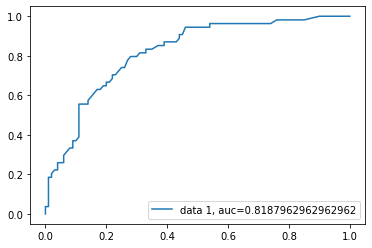

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
auc = roc_auc_score(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

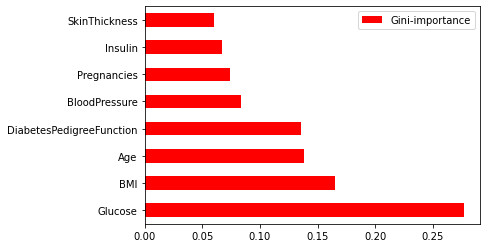

In [29]:
# Plot the impurity-based feature importances of the forest
feats = {} # a dict to hold feature_name: feature_importance
importances = clf.feature_importances_
for feature, importance in zip(X_col, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)
importances.plot.barh(color='r')

In [30]:
clf=LogisticRegression(solver='liblinear')
C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
penalties=['l1','l2']
# create grid
params = {
 'C': C_param_range,
 'penalty': penalties,
 }

clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='roc_auc',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 10000, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.5s finished


In [31]:
clf=LogisticRegression(C=100,penalty='l1',solver='liblinear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7857142857142857


In [32]:
df = pd.read_csv('Hitters_Data.csv')
df=df.dropna()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [33]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = np.log(df.Salary)

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

In [34]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Xscaled = scaler.fit_transform(X)

In [35]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=1)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    uint8  
 17  Division_W   263 non-null    uint8  
 18  NewLeague_N  263 non-null    uint8  
dtypes: float

In [37]:
regressor=RandomForestRegressor(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [3,4,5,6,7]
# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
# Random search of parameters
clf_grid = GridSearchCV(estimator = regressor, param_grid = params, 
                                cv = 5, verbose=2, scoring='neg_mean_squared_error',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   19.0s finished


{'max_features': 3, 'n_estimators': 300}


In [38]:
clf=RandomForestRegressor(random_state=0,n_estimators=300,max_features=3)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.15316995872097858


In [39]:
from sklearn.pipeline import Pipeline
# Create a pipeline
pipe = Pipeline([('Regressor', RandomForestRegressor())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'Regressor': [Ridge()],
                 'Regressor__alpha': np.logspace(-3, 1, 10)},
                {'Regressor': [Lasso(max_iter = 10000)],
                 'Regressor__alpha': np.logspace(-3, 1, 10)},
                {'Regressor': [KNeighborsRegressor()],
                 'Regressor__n_neighbors':[2,3,4,5,6]},
                {'Regressor': [RandomForestRegressor(random_state=0)],
                 'Regressor__n_estimators': [100, 200,300,400,500],
                 'Regressor__max_features': [3,4,5,6,7]}]

# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, y_train)
# View best model
best_model.best_estimator_.get_params()['Regressor']

RandomForestRegressor(max_features=3, n_estimators=300, random_state=0)

In [40]:
y_pred=best_model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.15316995872097858
